In [180]:
!pip install praw

In [181]:
!install pandas

usage: install [-bCcpSsUv] [-f flags] [-g group] [-m mode] [-o owner]
               [-M log] [-D dest] [-h hash] [-T tags]
               [-B suffix] [-l linkflags] [-N dbdir]
               file1 file2
       install [-bCcpSsUv] [-f flags] [-g group] [-m mode] [-o owner]
               [-M log] [-D dest] [-h hash] [-T tags]
               [-B suffix] [-l linkflags] [-N dbdir]
               file1 ... fileN directory
       install -dU [-vU] [-g group] [-m mode] [-N dbdir] [-o owner]
               [-M log] [-D dest] [-h hash] [-T tags]
               directory ...


In [182]:
import praw

# Reddit API credentials
reddit = praw.Reddit(
    client_id="OOdD_RYoUhglSs8WfK8O_Q",  # Client ID from the image
    client_secret="mcb28km8nnQL_AJ2RseyyulvfnTS5w",  # Secret from the image
    user_agent="YourUserAgent", # Can be any string, e.g., "MyRedditScraper"
    username="the-sik",
    password="Tan@12345"

)
print(f"Authenticated as: {reddit.user.me()}")

Authenticated as: the-sik


The above code authenticates with Reddit's API using PRAW, allowing the user to interact with Reddit programmatically. It initializes a Reddit instance with credentials (client ID, secret, user agent, my username, my password) and verifies authentication by printing the logged-in username.

The following code saves the deatils such as comment_id, usernmae, comment_text, score,created_utc, parent_id, and replies to a dataframe.

In [184]:
#post URL
url = "https://www.reddit.com/r/playboicarti/comments/1jan462/i_am_music_waiting_room_megathread/"
submission = reddit.submission(url=url)

# Extract comments
comments = []
submission.comments.replace_more(limit=None)  # Expand all comments
for comment in submission.comments.list():
    comments.append({
        "comment_id": comment.id,
        "username": comment.author.name if comment.author else "deleted",
        "comment_text": comment.body,
        "score": comment.score,
        "created_utc": comment.created_utc,
        "parent_id": comment.parent_id,
        "replies": len(comment.replies)
    })

df = pd.DataFrame(comments)
print(df.head())
df.to_csv("redditcommentsiammusic.csv", index=False)

  comment_id              username  \
0    mhn549a              andris62   
1    mhncdmv         BustinDiamond   
2    mhmz640      KenyattaLFrazier   
3    mhoywjj        ThirtyYearsWar   
4    mhplrln  PsychologicalShape52   

                                        comment_text  score   created_utc  \
0  Imagine waking up to this\n\nhttps://preview.r...   1031  1.741903e+09   
1  https://preview.redd.it/s5zrcw299joe1.jpeg?wid...    238  1.741905e+09   
2  https://preview.redd.it/pbih1masxioe1.jpeg?wid...    467  1.741901e+09   
3  Good Evening, “Playboi Carti” was a 84 month s...    135  1.741925e+09   
4       AKADEMICS IS A FAT ASS PEDOPHILE RAPIST FUCK    131  1.741937e+09   

    parent_id  replies  
0  t3_1jan462       32  
1  t3_1jan462        0  
2  t3_1jan462        2  
3  t3_1jan462        1  
4  t3_1jan462        2  


In [185]:
df.count()

comment_id      5860
username        5860
comment_text    5860
score           5860
created_utc     5860
parent_id       5860
replies         5860
dtype: int64

In [186]:
!pip install detoxify

In [187]:
from detoxify import Detoxify

In [188]:
df = pd.read_csv("redditcommentsiammusic.csv")
print(df.head(10))

  comment_id              username  \
0    mhn549a              andris62   
1    mhncdmv         BustinDiamond   
2    mhmz640      KenyattaLFrazier   
3    mhoywjj        ThirtyYearsWar   
4    mhplrln  PsychologicalShape52   
5    mhmzk5o      FishermanFun7778   
6    mhpppa9         OkForever9658   
7    mhpnw5z            me_funny__   
8    mhn36lp        TheAfricanMann   
9    mhppcn4              qyltimaa   

                                        comment_text  score   created_utc  \
0  Imagine waking up to this\n\nhttps://preview.r...   1031  1.741903e+09   
1  https://preview.redd.it/s5zrcw299joe1.jpeg?wid...    238  1.741905e+09   
2  https://preview.redd.it/pbih1masxioe1.jpeg?wid...    467  1.741901e+09   
3  Good Evening, “Playboi Carti” was a 84 month s...    135  1.741925e+09   
4       AKADEMICS IS A FAT ASS PEDOPHILE RAPIST FUCK    131  1.741937e+09   
5  https://preview.redd.it/nexdidx2yioe1.jpeg?wid...    654  1.741901e+09   
6  Damn I'd never watched a Kai stream bef

In [213]:
import torch
import pandas as pd
from detoxify import Detoxify

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
df = pd.read_csv("redditcommentsiammusic.csv")

# using batch processing to detoxify predictions
def batch_toxicity(texts, batch_size=64):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        preds = Detoxify("original", device=device).predict(batch)
        results.extend(preds["toxicity"])  # Extract toxicity scores
    return results

df["toxicity_score"] = batch_toxicity(df["comment_text"].tolist())

Using device: cpu


In [215]:
# Categorizing comments based on toxicity score.
def classify_toxicity(score):
    if score < 0.2:
        return "Non-Toxic"
    elif score < 0.6:
        return "Mildly Toxic"
    else:
        return "Highly Toxic"

df["toxicity_category"] = df["toxicity_score"].apply(classify_toxicity)
print(df[["comment_text", "toxicity_score", "toxicity_category"]].head())
df.to_csv("reddit_toxicity_analysis.csv", index=False)
print("Toxicity analysis completed!")

                                        comment_text  toxicity_score  \
0  Imagine waking up to this\n\nhttps://preview.r...        0.006611   
1  https://preview.redd.it/s5zrcw299joe1.jpeg?wid...        0.001643   
2  https://preview.redd.it/pbih1masxioe1.jpeg?wid...        0.001725   
3  Good Evening, “Playboi Carti” was a 84 month s...        0.000544   
4       AKADEMICS IS A FAT ASS PEDOPHILE RAPIST FUCK        0.998587   

  toxicity_category  
0         Non-Toxic  
1         Non-Toxic  
2         Non-Toxic  
3         Non-Toxic  
4      Highly Toxic  
Toxicity analysis completed!


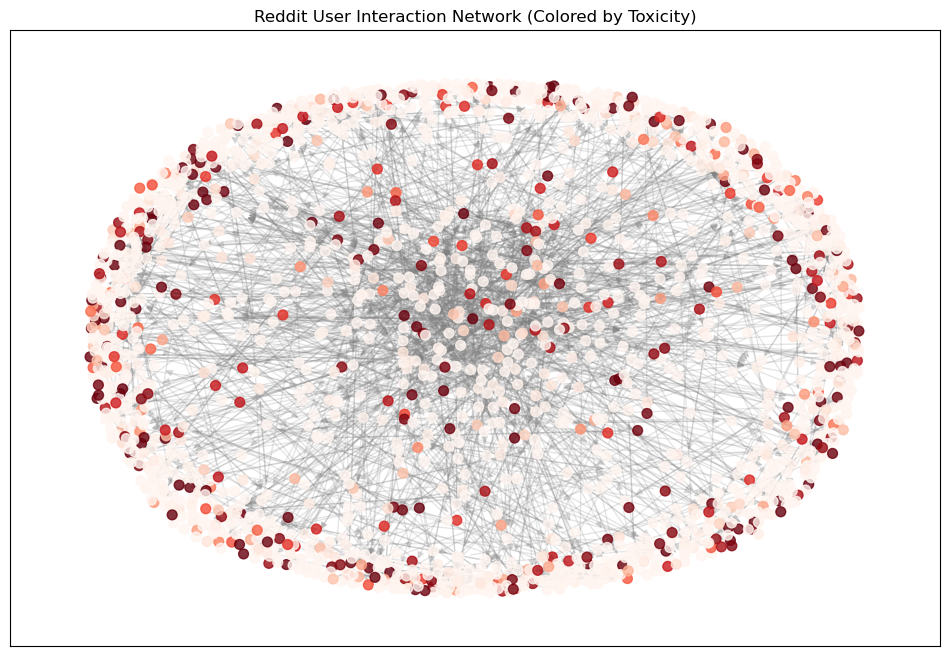

In [217]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("reddit_toxicity_analysis.csv")

# Creating a directed graph
G = nx.DiGraph()
user_toxicity = df.set_index("username")["toxicity_score"].to_dict()
for user in user_toxicity:
    if user and user != "deleted":  # Ignore deleted accounts
        G.add_node(user, toxicity=user_toxicity[user])

for n in G.nodes():
    if "toxicity" not in G.nodes[n]:  # If toxicity is missing, set default
        G.nodes[n]["toxicity"] = 0  # Assign a default non-toxic value

# Adding edges (reply interactions between users)
for _, row in df.iterrows():
    user = row["username"]
    parent_id = row["parent_id"]

    if parent_id.startswith("t1_"):  # Ensure it's a comment reply
        parent_comment = df[df["comment_id"] == parent_id[3:]]  # Remove "t1_" prefix
        if not parent_comment.empty:
            parent_user = parent_comment["username"].values[0]
            if parent_user and parent_user != "deleted" and parent_user != user:
                G.add_edge(user, parent_user)  # Directed edge: user → parent_user

# Analyzing Network - Community Detection (Louvain Method)
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
community_map = {}
for i, community in enumerate(communities):
    for user in community:
        community_map[user] = i

nx.set_node_attributes(G, community_map, "community")
node_colors = [G.nodes[n].get("toxicity", 0) for n in G.nodes()]  # Default to 0 if missing
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  # Layout for better visualization
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.Reds, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color="gray")
plt.title("Reddit User Interaction Network (Colored by Toxicity)")
plt.show()

From the network, color nodes indicates-
Light-colored nodes → Non-toxic users (toxicity score ≈ 0.0 - 0.2)
Medium-red nodes → Mildly toxic users (toxicity score ≈ 0.2 - 0.6)
Dark red nodes → Highly toxic users (toxicity score > 0.6)

In [220]:
print(df.head())
print(df.columns)

  comment_id              username  \
0    mhn549a              andris62   
1    mhncdmv         BustinDiamond   
2    mhmz640      KenyattaLFrazier   
3    mhoywjj        ThirtyYearsWar   
4    mhplrln  PsychologicalShape52   

                                        comment_text  score   created_utc  \
0  Imagine waking up to this\n\nhttps://preview.r...   1031  1.741903e+09   
1  https://preview.redd.it/s5zrcw299joe1.jpeg?wid...    238  1.741905e+09   
2  https://preview.redd.it/pbih1masxioe1.jpeg?wid...    467  1.741901e+09   
3  Good Evening, “Playboi Carti” was a 84 month s...    135  1.741925e+09   
4       AKADEMICS IS A FAT ASS PEDOPHILE RAPIST FUCK    131  1.741937e+09   

    parent_id  replies  toxicity_score toxicity_category  
0  t3_1jan462       32        0.006611         Non-Toxic  
1  t3_1jan462        0        0.001643         Non-Toxic  
2  t3_1jan462        2        0.001725         Non-Toxic  
3  t3_1jan462        1        0.000544         Non-Toxic  
4  t3_1jan462

In [222]:
print(f"Total number of comments: {len(df)}")

Total number of comments: 5860


In [224]:
print(f"Number of unique users: {df['username'].nunique()}")

Number of unique users: 1792


In [226]:
user_toxicity = df.set_index("username")["toxicity_score"].to_dict()
for user in user_toxicity:
    if user and user != "deleted":  # Ignore deleted accounts
        G.add_node(user, toxicity=user_toxicity[user])

print("Sample Node Data:", list(G.nodes(data=True))[:5])

Sample Node Data: [('andris62', {'toxicity': 0.0354467183351516, 'community': 9}), ('BustinDiamond', {'toxicity': 0.0016427305527031, 'community': 74}), ('KenyattaLFrazier', {'toxicity': 0.0259895119816064, 'community': 2}), ('ThirtyYearsWar', {'toxicity': 0.0005441154935397, 'community': 53}), ('PsychologicalShape52', {'toxicity': 0.7133141756057739, 'community': 0})]


In [228]:
df_user_toxicity = df.groupby("username")["toxicity_score"].mean().reset_index()

def classify_user_toxicity(score):
    if score < 0.2:
        return "Non-Toxic"
    elif score < 0.6:
        return "Mildly Toxic"
    else:
        return "Highly Toxic"

df_user_toxicity["Community"] = df_user_toxicity["toxicity_score"].apply(classify_user_toxicity)

df_community_summary = df_user_toxicity["Community"].value_counts().reset_index()
df_community_summary.columns = ["Community Type", "Number of Users"]
print(df_community_summary)

  Community Type  Number of Users
0      Non-Toxic             1270
1   Mildly Toxic              330
2   Highly Toxic              192


In [230]:
!pip install python-louvain

In [231]:
import pandas as pd
import networkx as nx
import community as community_louvain

partition = community_louvain.best_partition(G.to_undirected(), resolution=5.0)  # Adjusted for fewer groups
df_louvain_communities = pd.DataFrame(list(partition.items()), columns=["Username", "Community ID"])

df_community_sizes = df_louvain_communities["Community ID"].value_counts().reset_index()
df_community_sizes.columns = ["Community ID", "Number of Users"]
print("\n📊 Community Detection (Louvain Method) Results:")
print(df_community_sizes.head())


📊 Community Detection (Louvain Method) Results:
   Community ID  Number of Users
0             0               24
1           139               22
2            33               20
3           110               20
4           157               20


In [232]:
import pandas as pd
import networkx as nx

df = pd.read_csv("reddit_toxicity_analysis.csv")
G = nx.DiGraph()
for user in df["username"].unique():
    if user and user != "deleted":  # Ignore deleted accounts
        G.add_node(user)

for _, row in df.iterrows():
    user = row["username"]
    parent_id = row["parent_id"]

    if parent_id.startswith("t1_"):  # Ensure it's a comment reply
        parent_comment = df[df["comment_id"] == parent_id[3:]]  # Remove "t1_" prefix
        if not parent_comment.empty:
            parent_user = parent_comment["username"].values[0]
            if parent_user and parent_user != "deleted" and parent_user != user:
                G.add_edge(user, parent_user)

print("✅ Network Graph Successfully Reconstructed with", len(G.nodes()), "users and", len(G.edges()), "interactions.")

✅ Network Graph Successfully Reconstructed with 1792 users and 1756 interactions.


In [235]:
import community as community_louvain  
partition = community_louvain.best_partition(G.to_undirected(), resolution=5.0)

df_louvain_communities = pd.DataFrame(partition.items(), columns=["Username", "Community ID"])
print(df_louvain_communities.head(20))

                Username  Community ID
0               andris62             0
1          BustinDiamond             1
2       KenyattaLFrazier           114
3         ThirtyYearsWar             3
4   PsychologicalShape52             4
5       FishermanFun7778           122
6          OkForever9658             6
7             me_funny__             9
8         TheAfricanMann             8
9               qyltimaa             9
10             kysdarian            10
11       chromeheartbelt            83
12                jrluhn             0
13                Pyxxon            12
14           IcyFwsCarti           276
15               ha1der-           139
16     DylanCodsCokeLine            15
17             majintony            16
18                rruzii            17
19     Efficient-Bit5743            18


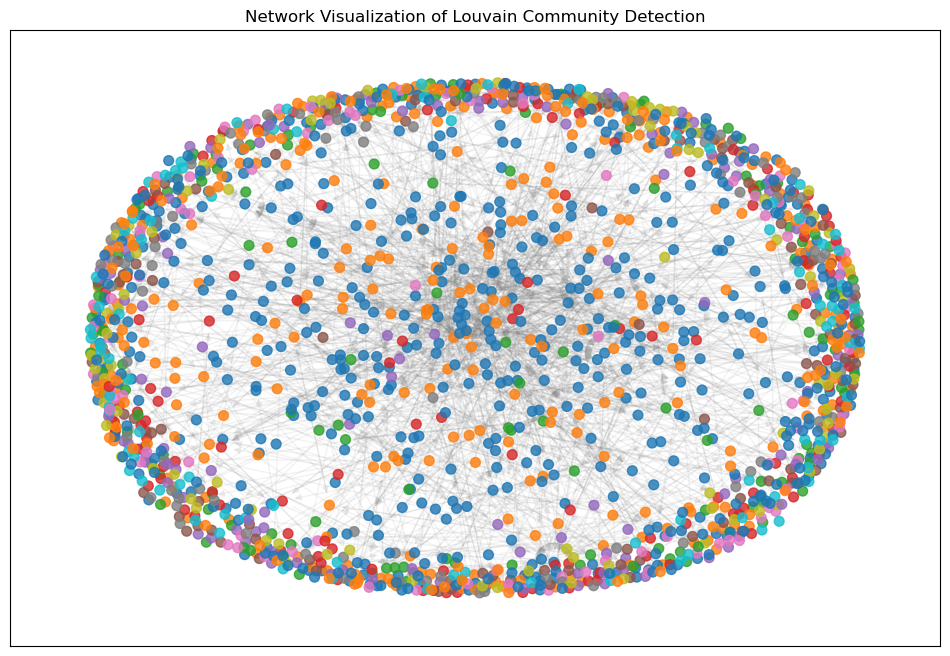

In [238]:
import matplotlib.pyplot as plt

community_colors = [partition[n] for n in G.nodes()]
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  # Layout for better spacing

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.tab10, node_color=community_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color="gray")

plt.title("Network Visualization of Louvain Community Detection")
plt.show()

In [239]:
df_partition = pd.DataFrame(partition.items(), columns=["username", "community_id"])
df = df.merge(df_partition, on="username", how="left")

df_toxicity_per_community = df.groupby("community_id")["toxicity_score"].mean().reset_index()
df_toxicity_per_community.columns = ["Community ID", "Avg Toxicity"]
df_toxic_users = df[df["toxicity_score"] > 0.6]
df_toxicity_ratio = df_toxic_users.groupby("community_id").size() / df.groupby("community_id").size()
df_toxicity_ratio = df_toxicity_ratio.fillna(0).reset_index()
df_toxicity_ratio.columns = ["Community ID", "Proportion of Highly Toxic Users"]

df_toxicity_analysis = df_toxicity_per_community.merge(df_toxicity_ratio, on="Community ID", how="left")
df_toxicity_analysis = df_toxicity_analysis.fillna(0) 

print("\n📊 Toxicity Distribution Across Communities:")
print(df_toxicity_analysis.head())


📊 Toxicity Distribution Across Communities:
   Community ID  Avg Toxicity  Proportion of Highly Toxic Users
0             0      0.229104                          0.225000
1             1      0.001643                          0.000000
2             2      0.944809                          1.000000
3             3      0.000593                          0.000000
4             4      0.441162                          0.452632


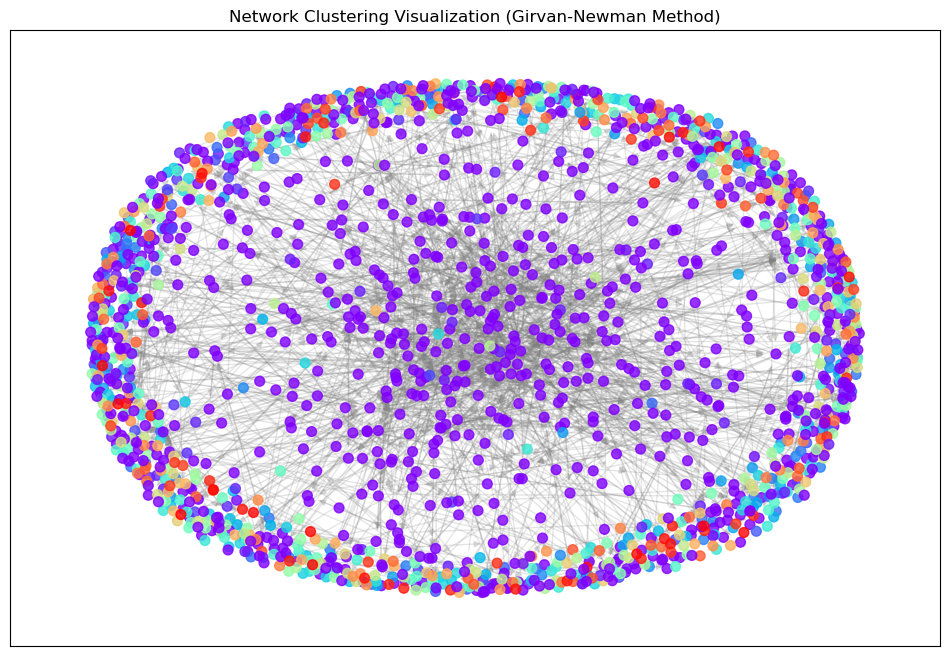

812

In [240]:
from networkx.algorithms import community
import matplotlib.pyplot as plt
import networkx as nx

comp = community.girvan_newman(G)
top_level_communities = next(comp)  # First level of detected communities
clusters = [list(c) for c in top_level_communities]

cluster_map = {}
for cluster_id, cluster in enumerate(clusters):
    for user in cluster:
        cluster_map[user] = cluster_id

nx.set_node_attributes(G, cluster_map, "cluster")
node_colors = [G.nodes[n]["cluster"] for n in G.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  # Force-directed layout
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.rainbow, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color="gray")
plt.title("Network Clustering Visualization (Girvan-Newman Method)")
plt.show()

num_clusters = len(set(cluster_map.values()))
num_clusters

In [243]:
network_stats = {
    "Number of Nodes (Users)": len(G.nodes()),
    "Number of Edges (Interactions)": len(G.edges()),
    "Average Degree": sum(dict(G.degree()).values()) / len(G.nodes()),
    "Density": nx.density(G),
    "Diameter (Longest Shortest Path)": nx.diameter(G.to_undirected()) if nx.is_connected(G.to_undirected()) else "Graph is not fully connected",
    "Average Clustering Coefficient": nx.average_clustering(G.to_undirected())}

df_network_stats = pd.DataFrame(list(network_stats.items()), columns=["Metric", "Value"])
print("\n Full Network Statistics:")
print(df_network_stats)


 Full Network Statistics:
                             Metric                         Value
0           Number of Nodes (Users)                          1792
1    Number of Edges (Interactions)                          1756
2                    Average Degree                      1.959821
3                           Density                      0.000547
4  Diameter (Longest Shortest Path)  Graph is not fully connected
5    Average Clustering Coefficient                      0.013292


In [244]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Getting Top 5 users for each measure!
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Users by Degree Centrality:")
for user, score in top_degree:
    print(f"{user}: {score:.2f}")

print("\nTop 10 Users by Betweenness Centrality:")
for user, score in top_betweenness:
    print(f"{user}: {score:.2f}")

print("\nTop 10 Users by Eigenvector Centrality:")
for user, score in top_eigenvector:
    print(f"{user}: {score:.2f}")


Top 10 Users by Degree Centrality:
TinyCatIsABoss: 0.03
NoPanic3036: 0.03
RnRClub44: 0.02
itsflatbush: 0.02
EvieGoesHard: 0.02
PsychologicalShape52: 0.02
remerdy1: 0.02
andris62: 0.02
xXzoomerXx: 0.02
CatchASvech: 0.02

Top 10 Users by Betweenness Centrality:
RnRClub44: 0.02
CatchASvech: 0.01
TinyCatIsABoss: 0.01
remerdy1: 0.01
itsflatbush: 0.01
PsychologicalShape52: 0.01
Independent-Fly-4962: 0.01
NoPanic3036: 0.01
ayofiresale: 0.01
EvieGoesHard: 0.01

Top 10 Users by Eigenvector Centrality:
EvieGoesHard: 0.32
NoPanic3036: 0.27
xXzoomerXx: 0.25
CatchASvech: 0.22
PsychologicalShape52: 0.20
TinyCatIsABoss: 0.20
cavestoryguy: 0.19
Few-Try-9243: 0.16
ceri2x2: 0.16
Wutang_John: 0.15


In [245]:
!pip install pyvis

In [246]:
from pyvis.network import Network
import networkx as nx
import pandas as pd

net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")
for node in G.nodes():
    user_toxicity = G.nodes[node].get("toxicity", 0)  # Get toxicity score
    comment = df[df["username"] == node]["comment_text"].iloc[0] if node in df["username"].values else "No Comment"
    
    net.add_node(
        node,
        title=f"User: {node}\nToxicity: {user_toxicity:.3f}\nComment: {comment[:200]}...",  # Truncate long comments
        color=f"rgb({255*user_toxicity}, {255*(1-user_toxicity)}, 150)",  # Red for toxic, green for non-toxic
        size=10 + (user_toxicity * 20)  # Increase size for highly toxic users
    )

for edge in G.edges():
    net.add_edge(edge[0], edge[1], color="gray", width=0.5)

net.show("interactive_toxicity_network.html")
print("✅ Interactive network saved! Open 'interactive_toxicity_network.html' in your browser.")

interactive_toxicity_network.html
✅ Interactive network saved! Open 'interactive_toxicity_network.html' in your browser.


/var/folders/f7/cdjw2tpj2vq4886wsx_dszjm0000gn/T/ipykernel_19945/2255886574.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_engagement, x="Toxicity Category", y="Avg Replies", ax=ax[0], palette="coolwarm")
/var/folders/f7/cdjw2tpj2vq4886wsx_dszjm0000gn/T/ipykernel_19945/2255886574.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_engagement, x="Toxicity Category", y="Avg Upvotes", ax=ax[1], palette="coolwarm")


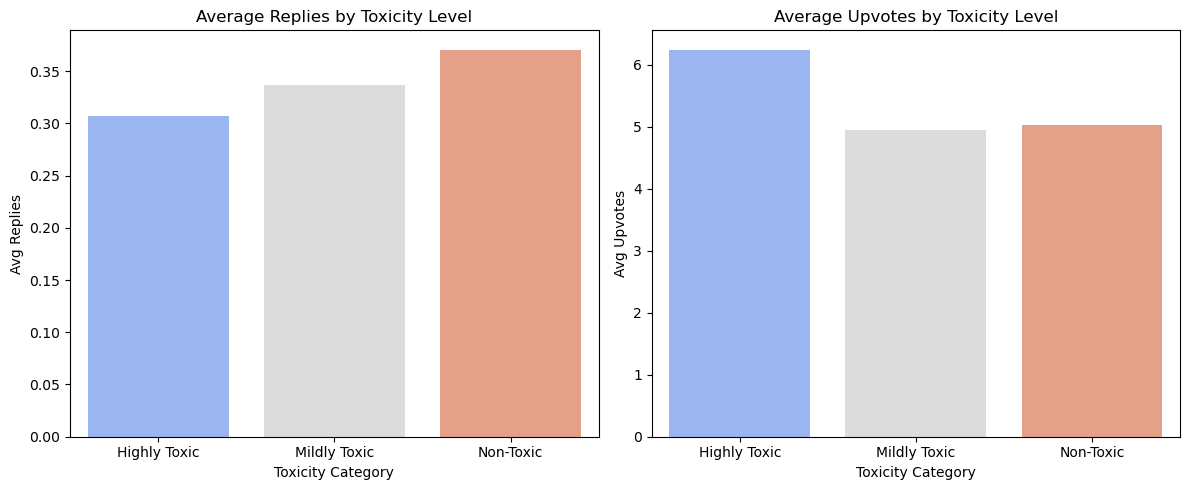

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

def classify_toxicity(score):
    if score < 0.2:
        return "Non-Toxic"
    elif score < 0.6:
        return "Mildly Toxic"
    else:
        return "Highly Toxic"

df["toxicity_category"] = df["toxicity_score"].apply(classify_toxicity)
df_engagement = df.groupby("toxicity_category")[["replies", "score"]].mean().reset_index()

df_engagement.columns = ["Toxicity Category", "Avg Replies", "Avg Upvotes"]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Replies vs. Toxicity
sns.barplot(data=df_engagement, x="Toxicity Category", y="Avg Replies", ax=ax[0], palette="coolwarm")
ax[0].set_title("Average Replies by Toxicity Level")
ax[0].set_ylabel("Avg Replies")

# Upvotes vs. Toxicity
sns.barplot(data=df_engagement, x="Toxicity Category", y="Avg Upvotes", ax=ax[1], palette="coolwarm")
ax[1].set_title("Average Upvotes by Toxicity Level")
ax[1].set_ylabel("Avg Upvotes")

plt.tight_layout()
plt.show()

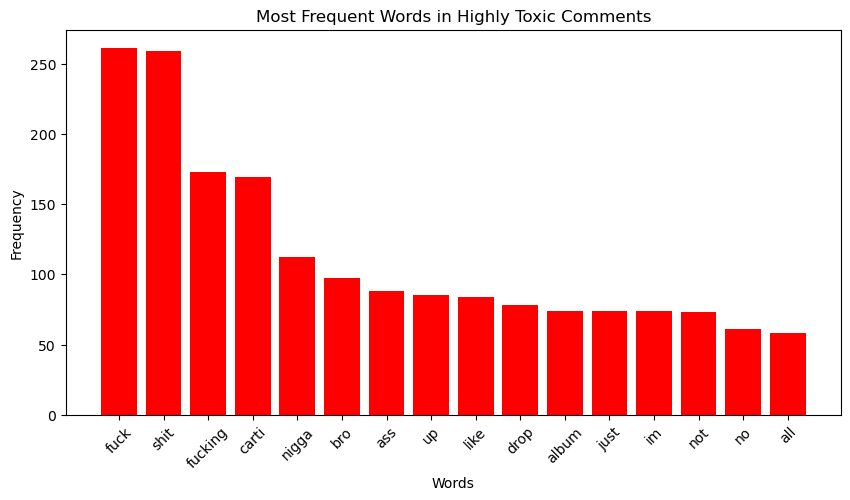

,Word,Frequency
0,fuck,261
1,shit,259
2,fucking,173
3,carti,169
4,nigga,112
5,bro,97
6,ass,88
7,up,85
8,like,84
9,drop,78


In [254]:
from collections import Counter
import string
import matplotlib.pyplot as plt

stop_words = set(["the", "and", "to", "of", "a", "in", "is", "it", "for", "on", 
                  "with", "that", "this", "was", "but", "be", "as", "at", "by", 
                  "are", "from", "or", "an", "so", "if", "you", "i", "we", "he", 
                  "she", "they", "his", "her", "my", "their", "your", "me", "him"])

highly_toxic_comments = df[df["toxicity_category"] == "Highly Toxic"]["comment_text"].dropna()
translator = str.maketrans("", "", string.punctuation)

words = []
for comment in highly_toxic_comments:
    cleaned_comment = comment.translate(translator).lower()
    words.extend([word for word in cleaned_comment.split() if word not in stop_words])

word_freq = Counter(words)
top_words = word_freq.most_common(16)  # Get top 15 most frequent words
df_top_words = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Plotting a bar chart of the most common words in highly toxic comments
plt.figure(figsize=(10, 5))
plt.bar(df_top_words["Word"], df_top_words["Frequency"], color="red")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Frequent Words in Highly Toxic Comments")
plt.xticks(rotation=45)
plt.show()
df_top_words